In [5]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [6]:
import numpy as np
import copy

from src.nqs import RBM, RandomHamiltonian, IsingHamiltonian, IsingHamiltonianReduced
import src.utils as utils
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:

seed = 42  # Seed for random number generator

error_array = []
steps_array = []
target_list =[]

for v in [2, 5, 9, 12]:
    visible_size = v
    hidden_size = v
    error_list = []
    steps_list=[]

    
    
    
    H = RandomHamiltonian(n=visible_size)
    
    for i in range(1,7):
        walker_steps = 100*4**i
        np.random.seed(seed)
        rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)
        

        mcmc, _ = np.histogram([utils.binary_array_to_int(state) for state in rbm.mcmc_dist()], 
                 density=True, 
                 bins=range(2**visible_size+1))
        exact= rbm.probability_dist()
        exact = exact.reshape(-1)
        error = utils.prob_error(exact, mcmc)
        error_list.append(error)
        
        print(f"Visible_size: {v}, error: {error_list[-1]}")
        
     
        if i == 6:
            error_array.append(error_list)
            steps_array = [10* j for j in range(1, i)]
            target_list.append(i)
            
            
            break


Visible_size: 2, error: 0.05998956428627936
Visible_size: 2, error: 0.02662510461338651
Visible_size: 2, error: 0.029750104613386542
Visible_size: 2, error: 0.0018346912268402404
Visible_size: 2, error: 0.003583314286279348
Visible_size: 2, error: 0.0049328868981597315
Visible_size: 5, error: 0.17523302027568918
Visible_size: 5, error: 0.10484090317080513
Visible_size: 5, error: 0.05588713724032232
Visible_size: 5, error: 0.01042506335525891
Visible_size: 5, error: 0.012368088502380543
Visible_size: 5, error: 0.006247399789125399
Visible_size: 9, error: 0.6373570958536703
Visible_size: 9, error: 0.24187573649525557
Visible_size: 9, error: 0.15965217855941974
Visible_size: 9, error: 0.07104943635160879
Visible_size: 9, error: 0.051481635402868944
Visible_size: 9, error: 0.01744239247640039
Visible_size: 12, error: 0.5201777756066296
Visible_size: 12, error: 0.2931645216438957
Visible_size: 12, error: 0.1099782498398889
Visible_size: 12, error: 0.06500047243828043
Visible_size: 12, error

<IPython.core.display.Javascript object>


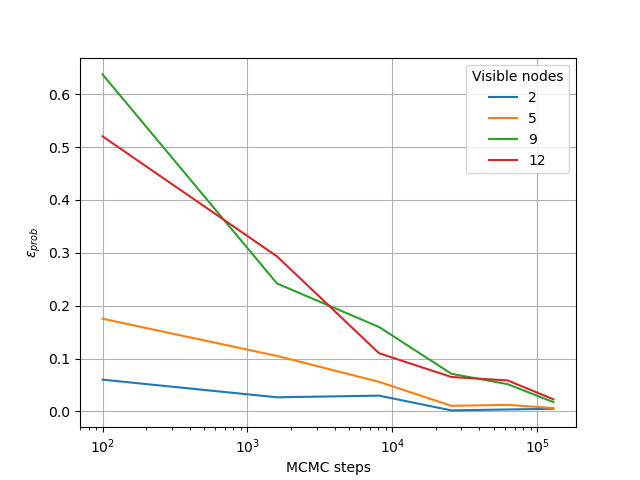

In [11]:
plt.figure(0)

#yint = range(min(), math.ceil(visible_list))+1)
#plt.yticks(yint)
labels=[]
for errors in error_array:
    plt.semilogx([100*j**4 for j in range(1, 7)], errors)

plt.legend([i for i in [2,5,9,12]],title = "Visible nodes")

plt.ylabel(r'$\epsilon_{prob}$')
plt.xlabel("MCMC steps")
plt.grid()

In [12]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/MCMC Random - accuracy by steps.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")